In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load All Pram Sold Data

In [57]:
df = pd.read_json('../../data/karori_sold.json')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   property_id                           154 non-null    object             
 1   date                                  154 non-null    datetime64[ns, UTC]
 2   price                                 133 non-null    float64            
 3   sales_count                           154 non-null    int64              
 4   url                                   154 non-null    object             
 5   address                               154 non-null    object             
 6   street                                154 non-null    object             
 7   street_number                         154 non-null    int64              
 8   suburb                                154 non-null    object             
 9   solar                

## Replace url with the real url

In [59]:
df['url'] = df['url'].apply(lambda x: f"https://homes.co.nz/address{x}")

In [60]:
df['date_month'] = pd.to_datetime(df['date']).dt.to_period('M')

/var/folders/rk/1bwp3kk16sl5nkdqkxc9rj1h0000gn/T/ipykernel_3170/1362257986.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date_month'] = pd.to_datetime(df['date']).dt.to_period('M')


## Show the data with duplicated address and only keep the highest price one

In [61]:
df.loc[df.duplicated(subset=['address'], keep=False), ['address','date_month', 'price', 'url', 'decade_built']]

,address,date_month,price,url,decade_built


In [62]:
df.sort_values(by=['price'], ascending=False, inplace=True)
df.drop_duplicates(subset=['address'], keep='first', inplace=True)

## Show Missing Data

In [63]:
#msno.bar(df)

In [64]:
df.isna().sum().sort_values(ascending=False)

price                                   21
display_estimated_rental_lower_value     9
display_estimated_rental_upper_value     9
decade_built                             8
solar                                    5
display_estimated_lower_value            0
agent                                    0
has_deck                                 0
land_area                                0
floor_area                               0
bed_estimate                             0
bath_estimate                            0
num_car_spaces                           0
estimated_rental_yield                   0
display_estimated_upper_value            0
property_id                              0
date                                     0
improvement_value                        0
land_value                               0
capital_value                            0
suburb                                   0
street_number                            0
street                                   0
address    

In [65]:
# Fill Missing Price Data with its mean value
#df['price'] = df['price'].replace(0, np.nan)
#df['price'] = df['price'].fillna(df['price'].mean())

## Display the data with missing price

In [66]:
df.loc[df['price'].isna(), ['address', 'capital_value', 'land_value', 'improvement_value', 'display_estimated_lower_value','display_estimated_lower_value', 'url']]

,address,capital_value,land_value,improvement_value,display_estimated_lower_value,display_estimated_lower_value,url
0,"2/271 Karori Road, Karori, Wellington",1060000,890000,170000,670000,670000,https://homes.co.nz/address/wellington/karori/...
1,"76A Collier Avenue, Karori, Wellington",690000,495000,195000,485000,485000,https://homes.co.nz/address/wellington/karori/...
2,"50A Monaghan Avenue, Karori, Wellington",840000,670000,170000,570000,570000,https://homes.co.nz/address/wellington/karori/...
3,"3/17 Wrights Hill Road, Karori, Wellington",600000,445000,155000,425000,425000,https://homes.co.nz/address/wellington/karori/...
4,"134 Donald Street, Karori, Wellington",1380000,980000,400000,945000,945000,https://homes.co.nz/address/wellington/karori/...
5,"1/10 Tisdall Street, Karori, Wellington",1200000,1060000,140000,820000,820000,https://homes.co.nz/address/wellington/karori/...
6,"14 Waikare Street, Karori, Wellington",2000000,1500000,500000,1510,1510,https://homes.co.nz/address/wellington/karori/...
7,"46 David Crescent, Karori, Wellington",2250000,1500000,750000,1330,1330,https://homes.co.nz/address/wellington/karori/...
9,"10 Nottingham Street, Karori, Wellington",2020000,2000000,20000,1050,1050,https://homes.co.nz/address/wellington/karori/...
10,"1 Chisenhall Street, Karori, Wellington",1900000,1360000,540000,1360,1360,https://homes.co.nz/address/wellington/karori/...


## Drop price if missing

In [67]:
df['price'] = df['price'].replace(0, np.nan)
df.dropna(subset = ['price'], inplace=True)

## calculate the average price group by suburb

<Axes: xlabel='suburb'>

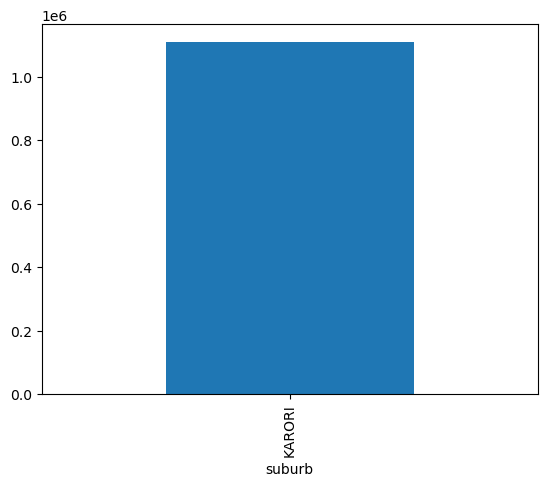

In [68]:
df.groupby(['suburb'])['price'].mean().sort_values(ascending=False).plot(kind='bar')


## Sales by month

<Axes: xlabel='date_month'>

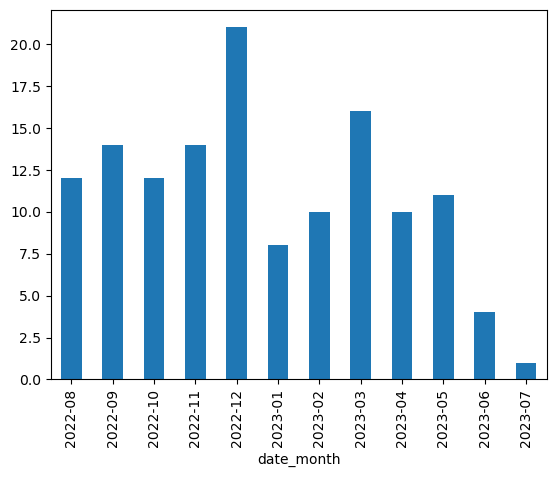

In [69]:
df.groupby(['date_month'])['date_month'].count().plot(kind='bar')

## Correlation of price

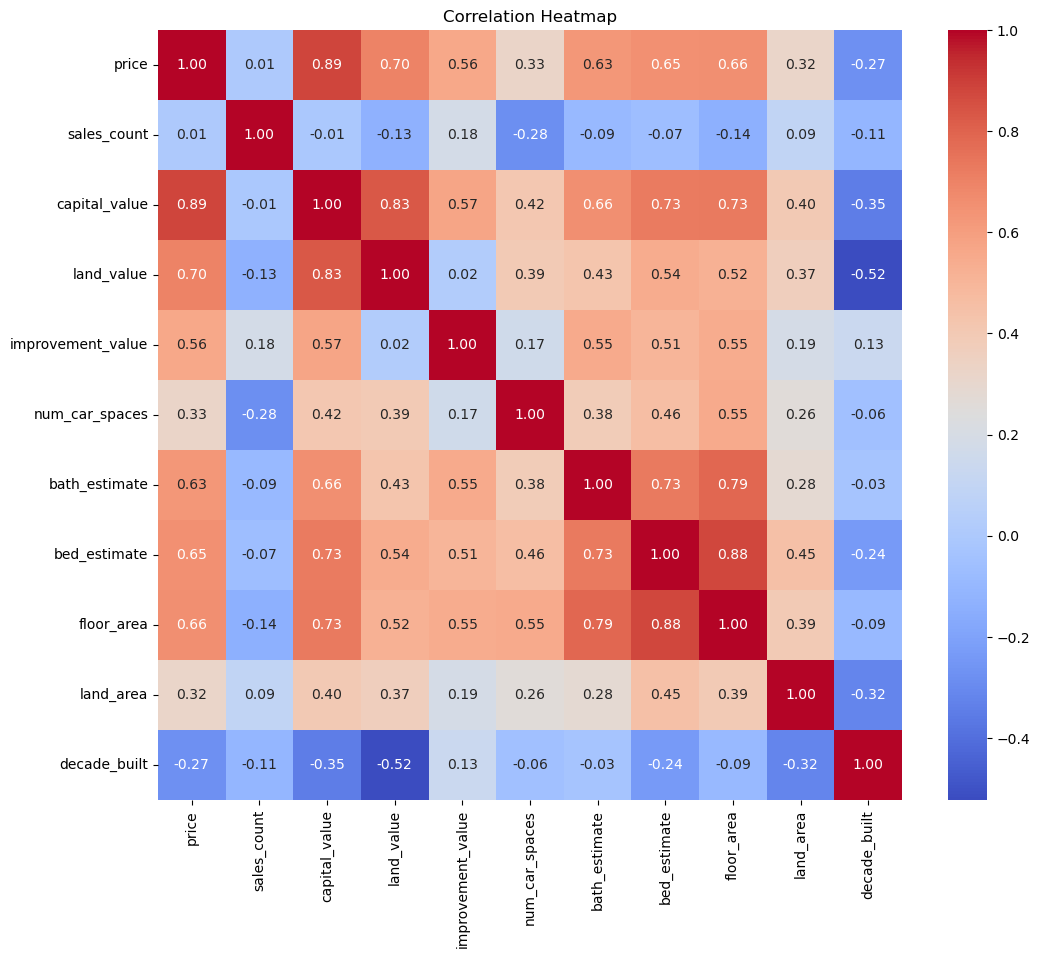

In [70]:
columns_of_interest = ['price',
                       'sales_count',
                       'capital_value',
                       'land_value',
                       'improvement_value',
                       'num_car_spaces',
                       'bath_estimate',
                       'bed_estimate',
                       'floor_area',
                       'land_area',
                       'decade_built'
                       ]
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## calculate percentage of (price - capital_value) / capital_value

<Axes: xlabel='suburb'>

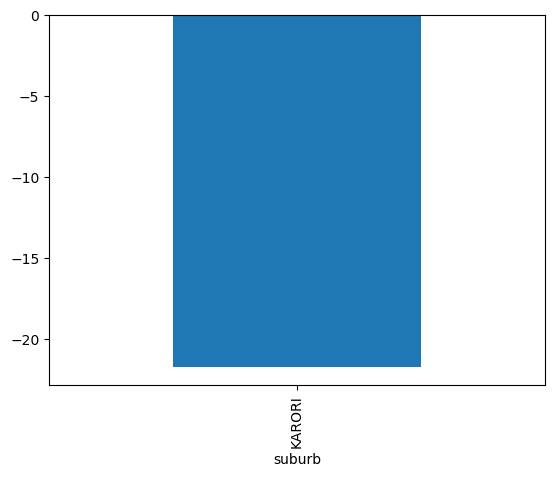

In [71]:
df['exceed_cv_percentage'] = (df['price'] - df['capital_value']) * 100 / df['capital_value']

## calculate the average exceed CV percentage group by suburb
df.groupby(['suburb'])['exceed_cv_percentage'].mean().sort_values(ascending=False).plot(kind='bar')


In [72]:
# Group data by suburb and calculate relevant statistics
grouped_data = df.groupby('suburb').agg({
    'property_id': 'count',
    'price': ['mean', 'min', 'max'],
    'sales_count': 'sum',
    'floor_area': 'mean',
    'land_area': 'mean'
}).reset_index()

# Rename the columns for better readability
grouped_data.columns = ['Suburb', 'Number of Sales', 'Average Price', 'Min Price', 'Max Price',
                        'Total Sales Count', 'Average Floor Area', 'Average Land Area']


# Calculate price per square meter
grouped_data['Price per sqm'] = grouped_data['Average Price'] / grouped_data['Average Floor Area']

# Sort by price per square meter
grouped_data_sorted = grouped_data.sort_values(by='Price per sqm')

# Calculate the average decade built for each suburb
average_decade_built = df.groupby('suburb')['decade_built'].mean().reset_index()

# Merge the average decade built with the grouped data
merged_data = pd.merge(grouped_data_sorted, average_decade_built, left_on='Suburb', right_on='suburb')

print(merged_data)


   Suburb  Number of Sales  Average Price  Min Price  Max Price  \
0  KARORI              133   1.109329e+06   415000.0  2567735.0   

   Total Sales Count  Average Floor Area  Average Land Area  Price per sqm  \
0                540          160.969925         502.263158    6891.528469   

   suburb  decade_built  
0  KARORI   1957.142857  
